In [42]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.linalg as lng # linear algebra from scipy library
from sklearn import preprocessing as preproc # load preprocessing function
import pandas as pd
# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

from sklearn.linear_model import LinearRegression
from scipy import linalg
from sklearn.impute import SimpleImputer

In [43]:
import scipy.io
import numpy as np
from sklearn import linear_model 
from scipy import linalg
from sklearn import preprocessing as preproc # load preprocessing function
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
from scipy.stats import linregress
from sklearn.model_selection import KFold
from statsmodels.sandbox.stats.multicomp import multipletests 
import warnings # to silence convergence warnings

# seaborn can be used to "prettify" default matplotlib plots by importing and setting as default
import seaborn as sns
sns.set() # Set searborn as default

from pathlib import Path

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster


In [44]:
path = Path().cwd()
data_file = path / "Data" / "HR_data.csv"
df = pd.read_csv(data_file)
# Drop the first column
df = df.drop(df.columns[0], axis=1)
n, p = df.shape

In [46]:
from sklearn.preprocessing import StandardScaler

# Assuming you have imported pandas as pd
# Assuming you have imported Path from pathlib as Path
path = Path().cwd()
data_file = path / "Data" / "HR_data.csv"
df = pd.read_csv(data_file)

# Drop the first column
df = df.drop(df.columns[0], axis=1)

# Standardize only the first 49 columns
scaler = StandardScaler()
df[df.columns[:49]] = scaler.fit_transform(df[df.columns[:49]])

# Now, the first 49 columns of df are standardized

In [47]:
# Check for missing variables
missing_values = df.isna().sum()
# Print the count of missing values for each variable
print("Missing Variables:")
print(missing_values[missing_values > 0])

Missing Variables:
EDA_TD_P_RT     1
EDA_TD_P_ReT    1
inspired        2
attentive       1
afraid          1
active          1
determined      2
dtype: int64


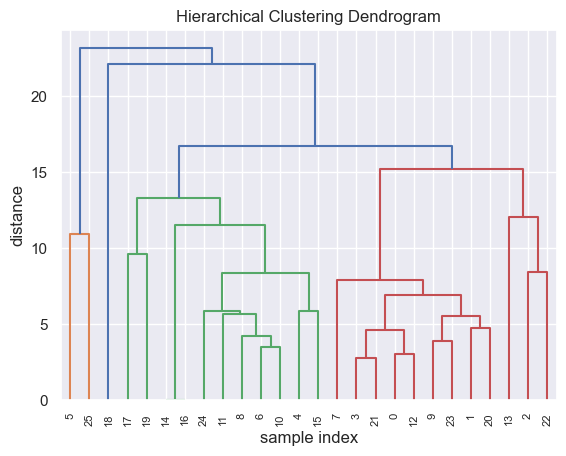

Enter the number of clusters (k) based on the dendrogram:  5


The indices associated with cluster 1 are:
(array([ 5, 25]),)


The indices associated with cluster 2 are:
(array([ 4,  6,  8, 10, 11, 14, 15, 16, 17, 19, 24]),)


The indices associated with cluster 3 are:
(array([ 0,  1,  3,  7,  9, 12, 20, 21, 23]),)


The indices associated with cluster 4 are:
(array([ 2, 13, 22]),)


The indices associated with cluster 5 are:
(array([18]),)




In [74]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Perform hierarchical clustering
Z = linkage(filtered2_df.iloc[:,:49], method=d_group, metric=d_sample)

# Plot the dendrogram
plt.figure()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
den = dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
    truncate_mode='lastp',
    p=N_leafs,
    no_labels=False
)
plt.show()

# Prompt user to input the value of k based on dendrogram visualization
k = int(input("Enter the number of clusters (k) based on the dendrogram: "))

# Perform clustering with the chosen value of k
cluster_designation = fcluster(Z, k, criterion='maxclust')

# Print information about the clusters
for i in range(1, k+1):
    datapoints = np.where(cluster_designation == i)
    print('The indices associated with cluster {} are:'.format(i))
    print(datapoints)
    print('\n')


In [80]:
from itertools import combinations
from sklearn.metrics import adjusted_rand_score

# Define a list to store ARI values for each combination of round and phase
ari_values = []

# Get all combinations of rounds and phases
rounds = df['Round'].unique()
phases = df['Phase'].unique()
combinations_rounds_phases = list(combinations([(round_val, phase_val) for round_val in rounds for phase_val in phases], 2))
k = 4
# Iterate over each pair of combinations
for (round1, phase1), (round2, phase2) in combinations_rounds_phases:
    # Filter the DataFrame for each combination
    filtered_data1 = df[(df['Round'] == round1) & (df['Phase'] == phase1)]
    filtered_data2 = df[(df['Round'] == round2) & (df['Phase'] == phase2)]
    
    # Perform hierarchical clustering on the filtered data for each combination
    Z1 = linkage(filtered_data1.iloc[:, :49], method=d_group, metric=d_sample)
    Z2 = linkage(filtered_data2.iloc[:, :49], method=d_group, metric=d_sample)
    
    # Assign cluster labels to the data points for each combination
    cluster_labels1 = fcluster(Z1, k, criterion='maxclust')
    cluster_labels2 = fcluster(Z2, k, criterion='maxclust')
    
    # Compute ARI between the clustering results of the two combinations
    ari = adjusted_rand_score(cluster_labels1, cluster_labels2)
    
    # Store the ARI value and combination
    ari_values.append(((round1, phase1), (round2, phase2), ari))

# Print ARI values for each combination of rounds and phases
for (round1, phase1), (round2, phase2), ari in ari_values:
    print(f'ARI between Round "{round1}" and Phase "{phase1}" vs Round "{round2}" and Phase "{phase2}": {ari}')


ARI between Round "round_3" and Phase "phase3" vs Round "round_3" and Phase "phase2": 0.18600768074803806
ARI between Round "round_3" and Phase "phase3" vs Round "round_3" and Phase "phase1": 0.5800694500524913
ARI between Round "round_3" and Phase "phase3" vs Round "round_2" and Phase "phase3": 0.3112479507377344
ARI between Round "round_3" and Phase "phase3" vs Round "round_2" and Phase "phase2": 0.16506952656689639
ARI between Round "round_3" and Phase "phase3" vs Round "round_2" and Phase "phase1": -0.011938996093052774
ARI between Round "round_3" and Phase "phase3" vs Round "round_4" and Phase "phase3": 0.38523765444520464
ARI between Round "round_3" and Phase "phase3" vs Round "round_4" and Phase "phase2": 0.18155347446289447
ARI between Round "round_3" and Phase "phase3" vs Round "round_4" and Phase "phase1": 0.3318125746509761
ARI between Round "round_3" and Phase "phase3" vs Round "round_1" and Phase "phase3": 0.2019373924476498
ARI between Round "round_3" and Phase "phase3" v

In [127]:
# Filter the DataFrame to include only the data points with category "round_1" in parameter "round"
filtered_df = df[df['Round'] == 'round_2']
filtered2_df = filtered_df[filtered_df['Phase'] == 'phase1']

# Use decomposition and subspace methods to investigate low-dimension representation of the data

We're looking for structure in the data, outlier detection, and dimensionality reduction

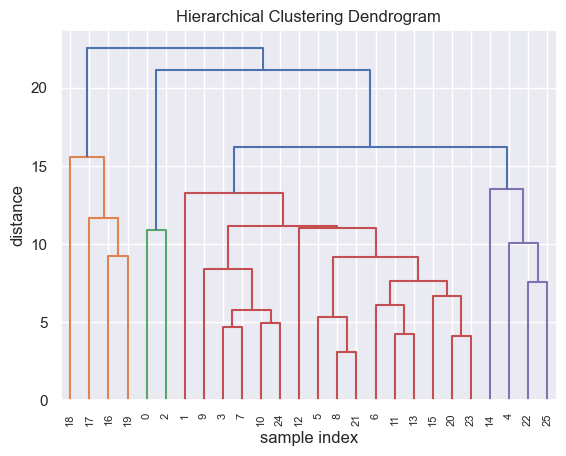

In [128]:
#For additional information concerning heirachical clustering in python, look at;
#https://joernhees.de/blog/2015/08/26/scipy-hierarchical-clustering-and-dendrogram-tutorial/

d_sample = 'euclidean' #See possible values: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist
d_group = 'ward' #See possible values (method): https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
N_leafs = 100 #Number of leaf nodes. n=400

Z = linkage(filtered2_df.iloc[:,:49], method=d_group, metric=d_sample) #method denotes cluster distance, metric denotes sample distance

plt.figure()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

#for scipy dendogram look at;
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

den = dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
    truncate_mode='lastp',
    p = N_leafs,
    no_labels = False
)
plt.show()

In [129]:
#look at the individual clusters
responseLabels = np.array(filtered2_df.iloc[:,53:54]).squeeze()
#print(filtered_df.iloc[:,53:54])
k=4 #Number of clusters. Determine a usable number from dendrogram

cluster_designation = fcluster(Z, k, criterion='maxclust') #Get cluster designation of data points

for i in range(1,k+1):
    datapoints = np.where(cluster_designation==i,)
    print('The labels associated with cluster {} is:'.format(i))
    print(responseLabels[datapoints])
    print('\n')

The labels associated with cluster 1 is:
[17 18 19 20]


The labels associated with cluster 2 is:
[1 3]


The labels associated with cluster 3 is:
[ 2  4  6  7  8  9 10 11 12 13 14 16 21 22 24 25]


The labels associated with cluster 4 is:
[ 5 15 23 26]




In [122]:

filtered2_df2 = filtered_df[filtered_df['Phase'] == 'phase3']

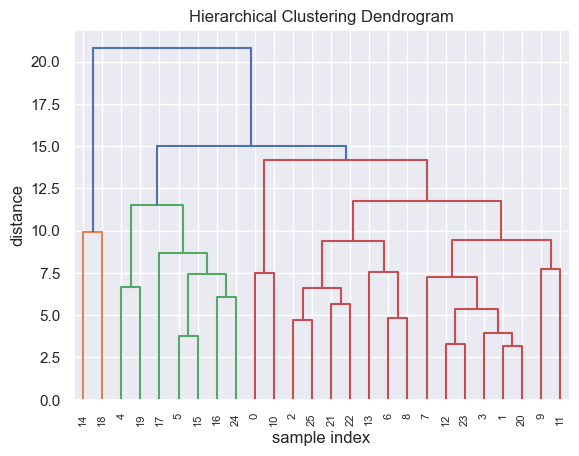

The labels associated with cluster 1 is:
[15 19]


The labels associated with cluster 2 is:
[ 5  6 16 17 18 20 25]


The labels associated with cluster 3 is:
[ 1 11]


The labels associated with cluster 4 is:
[ 2  3  4  7  8  9 10 12 13 14 21 22 23 24 26]




In [123]:
d_sample = 'euclidean' #See possible values: https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist
d_group = 'ward' #See possible values (method): https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html
N_leafs = 100 #Number of leaf nodes. n=400

Z = linkage(filtered2_df2.iloc[:,:49], method=d_group, metric=d_sample) #method denotes cluster distance, metric denotes sample distance

plt.figure()
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')

#for scipy dendogram look at;
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html

den = dendrogram(
    Z,
    leaf_rotation=90.,
    leaf_font_size=8.,
    truncate_mode='lastp',
    p = N_leafs,
    no_labels = False
)
plt.show()
#look at the individual clusters
responseLabels = np.array(filtered2_df2.iloc[:,53:54]).squeeze()
#print(filtered_df.iloc[:,53:54])
k=4 #Number of clusters. Determine a usable number from dendrogram

cluster_designation = fcluster(Z, k, criterion='maxclust') #Get cluster designation of data points

for i in range(1,k+1):
    datapoints = np.where(cluster_designation==i,)
    print('The labels associated with cluster {} is:'.format(i))
    print(responseLabels[datapoints])
    print('\n')